In [52]:
import pandas as pd
import numpy as np
import dabl

In [20]:
from sklearn.linear_model import LinearRegression
housing_data = pd.read_csv(r"C:\Users\MUSUNURI JANAKIRAM\Desktop\ram\123 AI course\Ram_practise\Ram_practise\California Housing Price Prediction\housing_data.csv")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
print(housing_data.shape)
print(housing_data.dtypes)

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [16]:
print(housing_data.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [17]:
#check whether there are any missing values or null
plt.figure(figsize=(15,8))housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

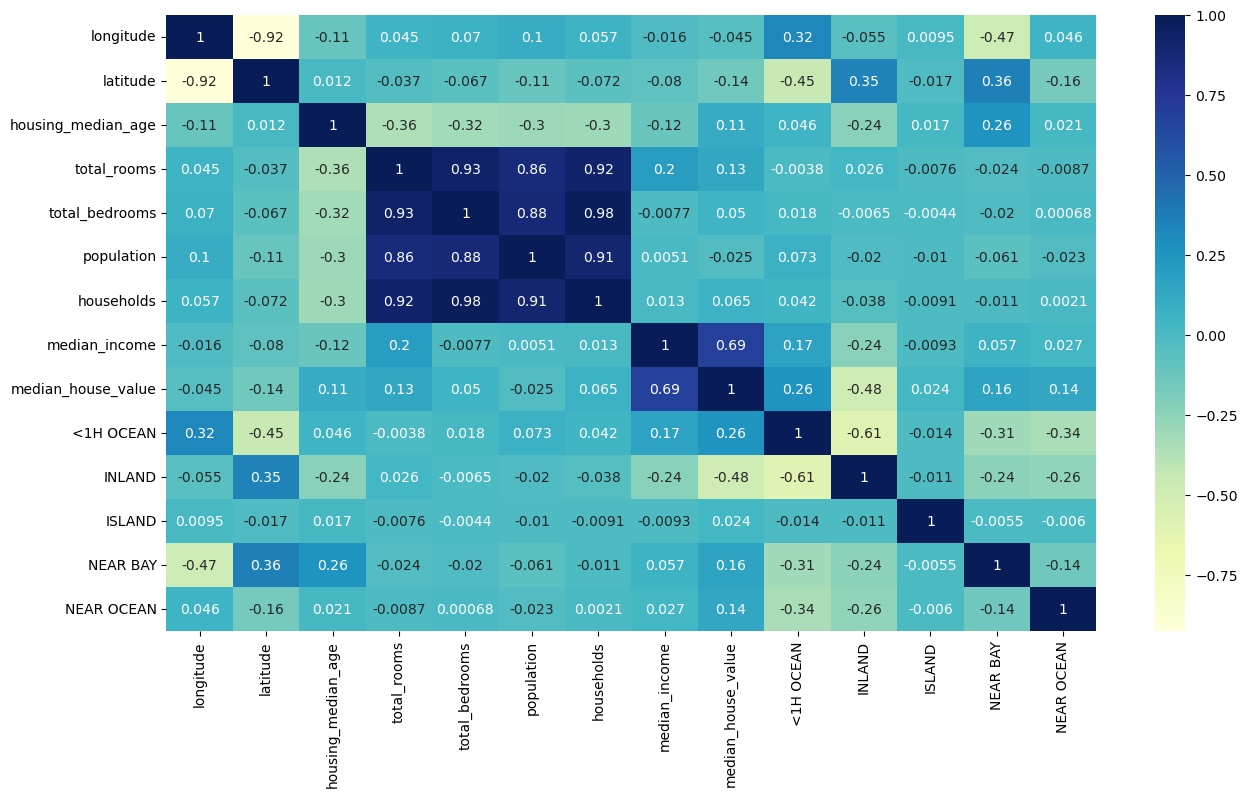

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_data.corr(),annot=True,cmap="YlGnBu")

# Simple Linear Regression with one variable (with correlation)

In [22]:
X = housing_data['median_income']
y = housing_data['median_house_value']
# Assumed that 'median income' is correlated with 'median house value' which is a target variable

In [23]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [24]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [25]:
# Print the model summary & evaluation metrics
print(model.summary())
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:01:22   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

In [ ]:
# write 2 to 3 lines about R2 score, Mean squared Errors

# Multiple Linear Regression

In [26]:
#check whether there are any missing values or null
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
# dropping the null values
housing_data.dropna(inplace=True)

In [29]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [30]:
print(housing_data.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [31]:
# checking the column ocean_proximity as it is an object
housing_data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
# Applying one hot encoding on ocean proximity
housing_data = housing_data.join(pd.get_dummies(housing_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [37]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

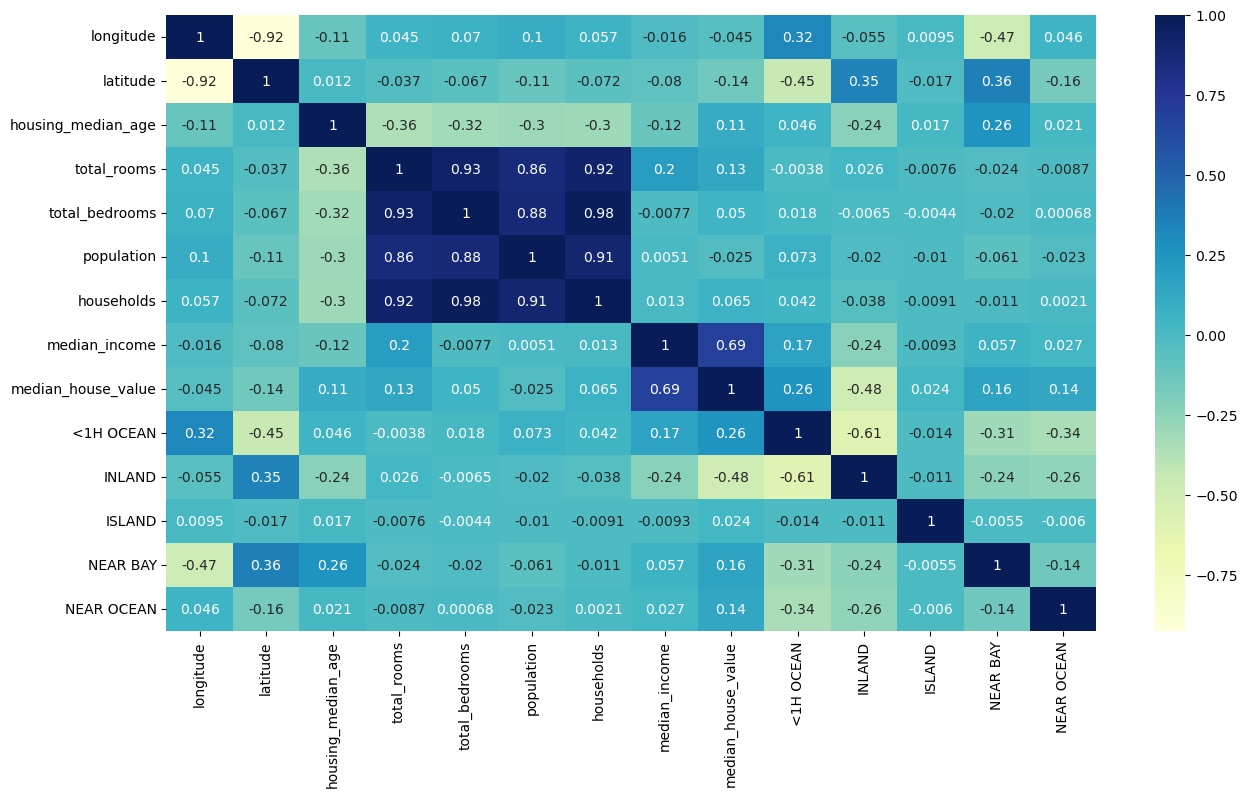

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_data.corr(),annot=True,cmap="YlGnBu")

In [45]:
# Data preprocessing
x = housing_data.drop(['median_house_value'],axis=1)
y = housing_data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape, x_test.shape)

(16346, 13) (4087, 13)


In [46]:
#Fitting a model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(x_test)

In [50]:
w = model.coef_
b = model.intercept_
print(w, b)

[-2.70253900e+04 -2.55868863e+04  1.08227769e+03 -5.84809652e+00
  9.86821438e+01 -3.63562493e+01  4.67969952e+01  3.89509610e+04
 -2.21781833e+04 -6.11291184e+04  1.27167021e+05 -2.76034035e+04
 -1.62563157e+04] -2269691.8582494003


In [55]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.641609931963893 4751862443.572282


In [ ]:
# Conclusion